<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Frameworks/Keras/CNNs/Cifar10%20Data%20Classification/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.cifar10 import load_data

## Load Data

In [2]:
# use Keras to import pre-shuffled cifar10 database
(X_train, y_train), (X_test, y_test) = load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

170500096/170498071 [==============================] - 3s 0us/step
The MNIST database has a training set of 50000 examples.
The MNIST database has a test set of 10000 examples.


## Visualize Multiple Images

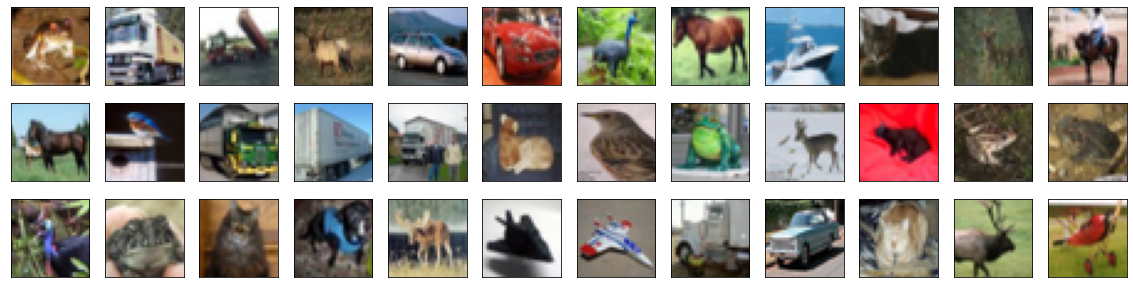

In [3]:
# plot first thirty six training images
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

## Rescale Data

In [4]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

## One Hot Encoding

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Training and Validation Sets

In [6]:
# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [7]:
# print shape of training set
print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## Create and Configure Augmented Image Generator

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

In [10]:
# fit augmented image generator on data
datagen_train.fit(X_train)

In [11]:
# take subset of training data
X_train_subset = X_train[:12]

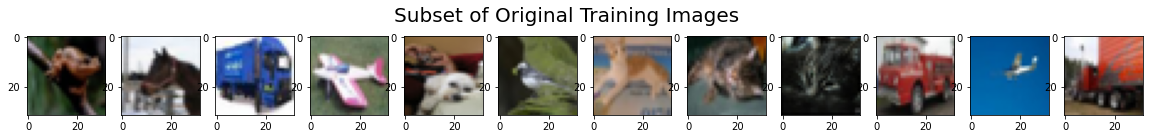

In [12]:
# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(X_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(X_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

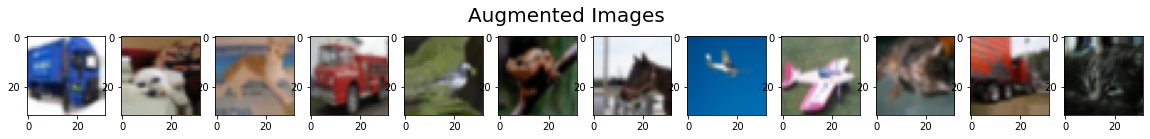

In [13]:
# visualize augmented images
fig = plt.figure(figsize=(20,2))
for X_batch in datagen_train.flow(X_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(X_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

## Model Set Up

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
# define the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

## Compile The Model

In [16]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Evaluation Before Training

In [17]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)
print('Test Loss : %.6f%%' % score[0])

Test accuracy: 10.72%
Test Loss : 2.301387%


## Train and Save Model 

In [18]:
from keras.callbacks import ModelCheckpoint   

In [19]:
batch_size = 32
epochs = 100

In [20]:
train_steps = X_train.shape[0] // batch_size
valid_steps = X_valid.shape[0] // batch_size

In [22]:
# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, save_best_only=True)
model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=train_steps,epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(X_valid, y_valid),
                    validation_steps=valid_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1406/1406 - 19s - loss: 1.6630 - accuracy: 0.3936 - val_loss: 1.3338 - val_accuracy: 0.5304

Epoch 00001: val_loss improved from inf to 1.33384, saving model to aug_model.weights.best.hdf5
Epoch 2/100
1406/1406 - 18s - loss: 1.4076 - accuracy: 0.4946
Epoch 3/100
1406/1406 - 18s - loss: 1.3070 - accuracy: 0.5306
Epoch 4/100
1406/1406 - 18s - loss: 1.2468 - accuracy: 0.5554
Epoch 5/100
1406/1406 - 18s - loss: 1.2090 - accuracy: 0.5745
Epoch 6/100
1406/1406 - 18s - loss: 1.1913 - accuracy: 0.5828
Epoch 7/100
1406/1406 - 18s - loss: 1.1812 - accuracy: 0.5903
Epoch 8/100
1406/1406 - 18s - loss: 1.1814 - accuracy: 0.5917
Epoch 9/100
1406/1406 - 18s - loss: 1.1773 - accuracy: 0.5919
Epoch 10/100
1406/1406 - 18s - loss: 1.1777 - accuracy: 0.5948
Epoch 11/100
1406/1406 - 18s - loss: 1.1853 - accuracy: 0.5929
Epoch 12/100
1406/1406 - 18s - loss: 1.1931 - accuracy: 0.5915
Epoch 13/100
1406/1406 - 18s - loss: 1.2105 - accuracy: 0.5874
Epoch 14/100
1406/1406 - 18s - loss: 1.2268 - accur

## Load the Model

In [23]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

## Evaluate Model after Training

In [24]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)
print('Test Loss : %.6f%%' % score[0])

Test accuracy: 52.89%
Test Loss : 1.326004%
